# Groundwater discharge

In this tutorial we will simulate a fictitious radioactive tracer that is injected into the ocean by groundwater discharge.
The global groundwater discharge dataset for 40,000 coastal watersheds from [*Luijendijk et al.* (2020)](https://www.nature.com/articles/s41467-020-15064-8) is available from within the AIBECS.
Once "born", our ficitious tracer decays with a parameter timescale $\tau$ as it flows through ocean basins.

The 3D tracer equation is:

$$\left[\frac{\partial}{\partial t} + \nabla \cdot (\boldsymbol{u} + \mathbf{K}\nabla)\right] x = s_\mathsf{gw} - x / \tau$$

where $\nabla \cdot \left[ \boldsymbol{u} - \mathbf{K} \nabla \right]$ represents the ocean circulation transport.
(Tracer transport operators are described in the documentation.)
The source of the tracer is $s_\mathsf{gw}$, and $x / \tau$ is the decay rate.

In AIBECS, we must recast this equation in the generic form

$$\left[\frac{\partial}{\partial t} + \mathbf{T}(\boldsymbol{p})\right] \boldsymbol{x} = \boldsymbol{G}(\boldsymbol{x},\boldsymbol{p}).$$

We start by telling Julia that we want to use the AIBECS and the OCIM2 transport matrix for the ocean circulation.

In [1]:
using AIBECS
grd, T_OCIM2 = OCIM2.load()

┌ Warning: Over-writing registration of the datadep
│   name = "AIBECS-OCIM2_CTL_He"
└ @ DataDeps ~/.julia/packages/DataDeps/ae6dT/src/registration.jl:15
┌ Info: You are about to use the OCIM2_CTL_He model.
│ If you use it for research, please cite:
│ 
│ - DeVries, T., & Holzer, M. (2019). Radiocarbon and helium isotope constraints on deep ocean ventilation and mantle‐³He sources. Journal of Geophysical Research: Oceans, 124, 3036–3057. https://doi.org/10.1029/2018JC014716
│ 
│ You can find the corresponding BibTeX entries in the CITATION.bib file
│ at the root of the AIBECS.jl package repository.
└ (Look for the "DeVries_Holzer_2019" key.)


(, sparse([1, 2, 10384, 10442, 10443, 20825, 20883, 1, 2, 3  …  200160, 197886, 199766, 199777, 199778, 199779, 199790, 200156, 200159, 200160], [1, 1, 1, 1, 1, 1, 1, 2, 2, 2  …  200159, 200160, 200160, 200160, 200160, 200160, 200160, 200160, 200160, 200160], [0.00019778421518954799, 2.3427916742722093e-9, -1.9599474163829085e-7, -0.00019161212648881556, 4.8096149072091506e-9, -1.830592653460076e-9, 5.007679174162751e-9, -5.025164843241415e-8, 0.00018753126417941492, 4.264266869682882e-8  …  -2.196560075226544e-8, 1.0819937104262028e-10, 6.709812718407374e-9, -1.263521554746615e-9, -3.3927920410468295e-9, 7.593163378667893e-9, -7.410175543096161e-9, -3.441057669604186e-8, -2.0030251520181335e-8, 5.2794476107904204e-8], 200160, 200160))

For the radioactive decay, we simply use

In [2]:
function decay(x, p)
    @unpack τ = p
    return x / τ
end

decay (generic function with 1 method)

To build the groundwater sources, we will load the geographic locations and discharge of groundwater (in m³ yr⁻¹) from the *Luijendijk et al.* (2020)) dataset.

In [3]:
gws = GroundWaters.load()


7-Zip (a) [64] 17.04 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.04 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,3 CPUs x64)

Scanning the drive for archives:
1 file, 31784239 bytes (31 MiB)

Extracting archive: /Users/runner/.julia/datadeps/groundwater_discharge/41467_2020_15064_MOESM8_ESM.zip
--
Path = /Users/runner/.julia/datadeps/groundwater_discharge/41467_2020_15064_MOESM8_ESM.zip
Type = zip
Physical Size = 31784239

Everything is Ok

Folders: 1
Files: 5
Size:       137157916
Compressed: 31784239
┌ Info: You are about to use the groundwater discharge data set.
│ If you use it for research, please cite:
│ 
│ - Luijendijk, E., Gleeson, T. & Moosdorf, N. Fresh groundwater discharge insignificant for the world’s oceans but important for coastal ecosystems. Nat Commun 11, 1260 (2020). doi:10.1038/s41467-020-15064-8
│ - Luijendijk, Elco; Gleeson, Tom; Moosdorf, Nils (2019): Geospatial data and model results for a global model study of coastal groundwater discharg

40409-element Vector{AIBECS.GroundWaters.GroundWaterSource{Quantity{Float64, 𝐋³ 𝐓⁻¹, Unitful.FreeUnits{(m³, yr⁻¹), 𝐋³ 𝐓⁻¹, nothing}}}}:
 AIBECS.GroundWaters.GroundWaterSource{Quantity{Float64, 𝐋³ 𝐓⁻¹, Unitful.FreeUnits{(m³, yr⁻¹), 𝐋³ 𝐓⁻¹, nothing}}}(35.1794887415, 24.2257701314, 47358.8148595 m³ yr⁻¹)
 AIBECS.GroundWaters.GroundWaterSource{Quantity{Float64, 𝐋³ 𝐓⁻¹, Unitful.FreeUnits{(m³, yr⁻¹), 𝐋³ 𝐓⁻¹, nothing}}}(35.3417438136, 23.8746131396, 185142.093516 m³ yr⁻¹)
 AIBECS.GroundWaters.GroundWaterSource{Quantity{Float64, 𝐋³ 𝐓⁻¹, Unitful.FreeUnits{(m³, yr⁻¹), 𝐋³ 𝐓⁻¹, nothing}}}(35.4161096656, 23.6050233764, 171000.541515 m³ yr⁻¹)
 AIBECS.GroundWaters.GroundWaterSource{Quantity{Float64, 𝐋³ 𝐓⁻¹, Unitful.FreeUnits{(m³, yr⁻¹), 𝐋³ 𝐓⁻¹, nothing}}}(35.4266133609, 23.4030494462, 206889.096486 m³ yr⁻¹)
 AIBECS.GroundWaters.GroundWaterSource{Quantity{Float64, 𝐋³ 𝐓⁻¹, Unitful.FreeUnits{(m³, yr⁻¹), 𝐋³ 𝐓⁻¹, nothing}}}(35.7820677063, 22.6137148344, 667545.345579 m³ yr⁻¹)
 AIBECS.GroundWaters.GroundWa

This is an array of groundwater sources, for which the type `GroundWaterSource{T}` contains the lat–lon coordinates and discharge in m³ yr⁻¹.
For example, the first element is

In [4]:
gws[1]

AIBECS.GroundWaters.GroundWaterSource{Quantity{Float64, 𝐋³ 𝐓⁻¹, Unitful.FreeUnits{(m³, yr⁻¹), 𝐋³ 𝐓⁻¹, nothing}}}(35.1794887415, 24.2257701314, 47358.8148595 m³ yr⁻¹)

We can check the locations with

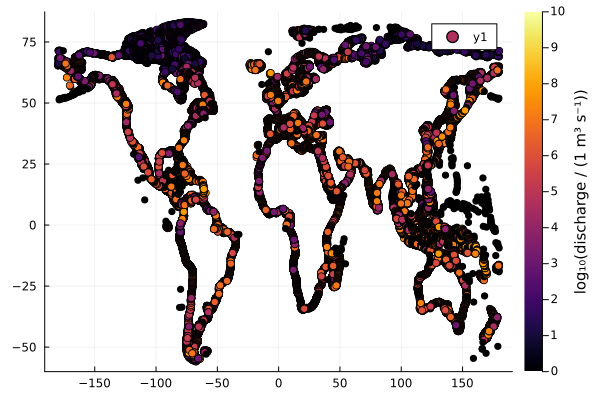

In [5]:
using Plots
scatter([x.lon for x in gws], [x.lat for x in gws],
        zcolor=log10.(ustrip.([x.VFR for x in gws] / u"m^3/s")),
        colorbartitle="log₁₀(discharge / (1 m³ s⁻¹))",
        clim=(0,10), fmt=:png)

We can regrid these into the OCIM2 grid and return the corresponding vector with

In [6]:
gws_grd = ustrip.(u"m^3/s", regrid(gws, grd))

200160-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

(We convert years to seconds for AIBECS)

We can control the global magnitude of the discharge by chosing a concentration of our tracer in groundwater, $C_\mathsf{gw}$, in mol m⁻³.
For that, we need the volumes of the grid boxes

In [7]:
v = volumevec(grd)

200160-element Vector{Float64}:
 5.693492696598497e11
 6.267656666812283e11
 6.834351352130837e11
 7.392901411788552e11
 7.942641211123751e11
 8.482915614828765e11
 9.013080767686609e11
 9.532504861865775e11
 1.004056888985702e12
 1.053666738215696e12
 ⋮
 2.7437236229729617e13
 2.6923849140323855e13
 2.83653451428806e13
 2.7917925846214992e13
 2.7437236229729617e13
 2.6923849140323855e13
 2.83653451428806e13
 2.7917925846214992e13
 2.7437236229729617e13

because the source is given by the mass (discharge × concentration) divided by the volume of each box:

In [8]:
function s_gw(p)
    @unpack C_gw = p
    return @. gws_grd * C_gw / v
end

s_gw (generic function with 1 method)

We then write the generic $\boldsymbol{G}$ function, which is

In [9]:
G_gw(x,p) = s_gw(p) - decay(x,p)

G_gw (generic function with 1 method)

##### Parameters

We specify some initial values for the parameters and also include units.

In [10]:
import AIBECS: @units, units
import AIBECS: @initial_value, initial_value
@initial_value @units struct GroundWatersParameters{U} <: AbstractParameters{U}
    τ::U    | 20.0 | u"yr"
    C_gw::U |  1.0 | u"mol/m^3"
end

initial_value (generic function with 31 methods)

Finally, thanks to the initial values we provided, we can instantiate the parameter vector succinctly as

In [11]:
p = GroundWatersParameters()

 Row │ Symbol  Value    Initial value  Unit
     │ Symbol  Float64  Float64        FreeUnit…
─────┼───────────────────────────────────────────
   1 │ τ          20.0           20.0  yr
   2 │ C_gw        1.0            1.0  mol m⁻³

We build the state function `F`,

In [12]:
F = AIBECSFunction(T_OCIM2, G_gw)

(::SciMLBase.ODEFunction{false, SciMLBase.FullSpecialize, AIBECS.var"#f#58"{Tuple{AIBECS.var"#49#50"{SparseMatrixCSC{Float64, Int64}}}, Vector{Int64}, AIBECS.var"#G#56"{Tuple{typeof(Main.var"##389".G_gw)}, AIBECS.var"#tracers#54"{Int64, Int64}}, AIBECS.var"#tracer#55"{Int64, Int64}}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, AIBECS.var"#jac#63"{AIBECS.var"#T#60"{Tuple{AIBECS.var"#49#50"{SparseMatrixCSC{Float64, Int64}}}, Int64, Vector{Int64}}, AIBECS.var"#∇ₓG#59"{Tuple{typeof(Main.var"##389".G_gw)}, Int64, Int64}}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}) (generic function with 1 method)

the steady-state problem `prob`,

In [13]:
nb = sum(iswet(grd))
x = ones(nb) # initial guess
prob = SteadyStateProblem(F, x, p)

SteadyStateProblem with uType Vector{Float64}. In-place: false
u0: 200160-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

and solve it

In [14]:
sol = solve(prob, CTKAlg()).u * u"mol/m^3"

200160-element Vector{Quantity{Float64, 𝐍 𝐋⁻³, Unitful.FreeUnits{(m⁻³, mol), 𝐍 𝐋⁻³, nothing}}}:
 -1.1976569114245692e-7 mol m⁻³
 -1.4479734380088998e-7 mol m⁻³
 -1.4879453161967887e-7 mol m⁻³
 -1.5817358327495586e-7 mol m⁻³
 -1.9520226202176615e-7 mol m⁻³
 -2.0677685877025549e-7 mol m⁻³
 -2.2443661038761358e-7 mol m⁻³
 -4.1123842884196016e-7 mol m⁻³
  -5.599692326820508e-7 mol m⁻³
  -4.425251364360959e-7 mol m⁻³
                              ⋮
   5.356179456771745e-8 mol m⁻³
   9.890403277283755e-8 mol m⁻³
 -1.0615715734081943e-7 mol m⁻³
  -3.777197030624588e-8 mol m⁻³
   7.586448212525744e-8 mol m⁻³
  1.8682291679180856e-7 mol m⁻³
   -6.14559168215307e-8 mol m⁻³
   -6.28359735212723e-8 mol m⁻³
    6.06816725082375e-8 mol m⁻³

Let's now run some visualizations using the plot recipes.
Taking a horizontal slice of the 3D field at 200m gives

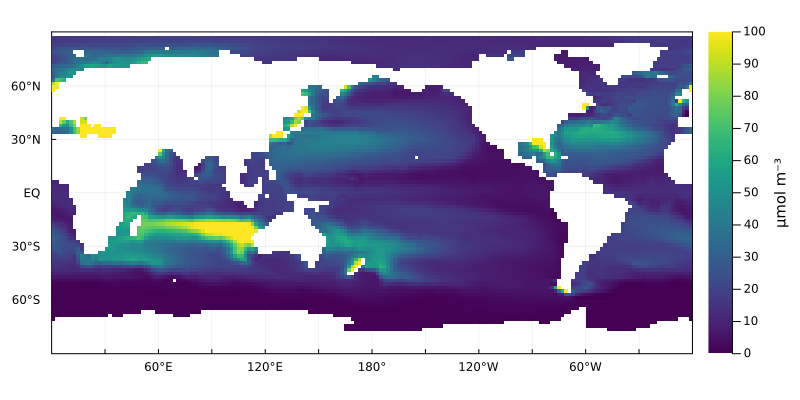

In [15]:
cmap = :viridis
plothorizontalslice(sol, grd, zunit=u"μmol/m^3", depth=200, color=cmap, clim=(0,100))

and at 500m:

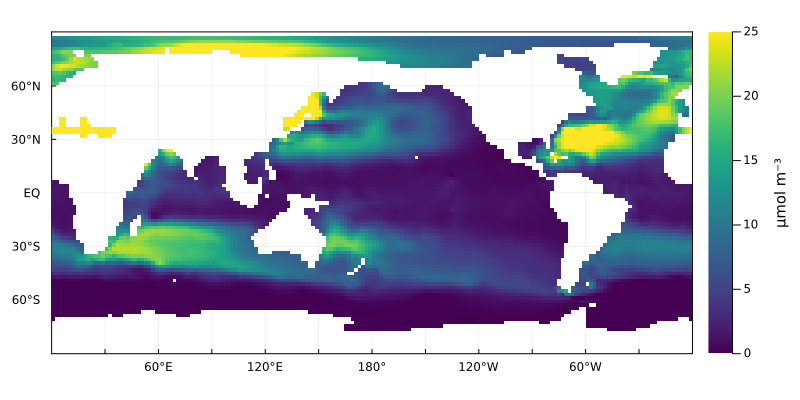

In [16]:
plothorizontalslice(sol, grd, zunit=u"μmol/m^3", depth=500, color=cmap, clim=(0,25))

Or we can increase the decay timescale (×10) and decrease the groundwater concentration (÷10) to get a different (more well-mixed) tracer distribution:

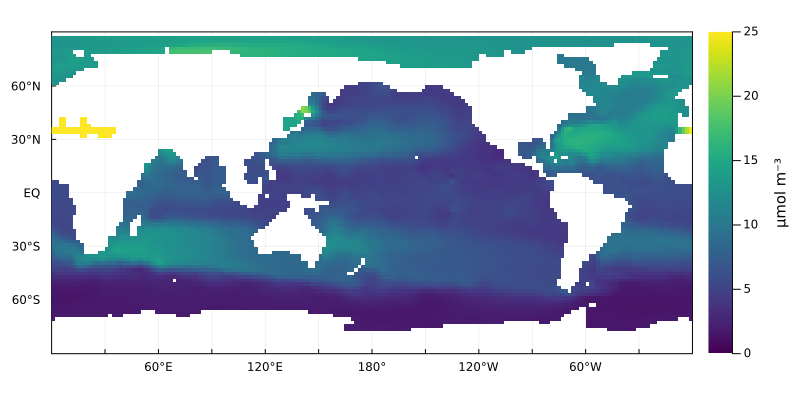

In [17]:
p = GroundWatersParameters(τ = 200.0u"yr", C_gw = 0.1u"mol/m^3")
prob = SteadyStateProblem(F, x, p)
sol_τ50 = solve(prob, CTKAlg()).u * u"mol/m^3"
plothorizontalslice(sol_τ50, grd, zunit=u"μmol/m^3", depth=500, color=cmap, clim=(0,25))

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*